In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from pydataset import data

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

from env import user, host, password
import acquire
import summarize
import prepare

np.random.seed(5)

In [2]:
df = data("iris")

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.10,3.50,1.40,0.20,setosa
2,4.90,3.00,1.40,0.20,setosa
3,4.70,3.20,1.30,0.20,setosa
4,4.60,3.10,1.50,0.20,setosa
5,5.00,3.60,1.40,0.20,setosa


In [4]:
df.columns = [c.lower().replace('.', '_') for c in df]

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.10,3.50,1.40,0.20,setosa
2,4.90,3.00,1.40,0.20,setosa
3,4.70,3.20,1.30,0.20,setosa
4,4.60,3.10,1.50,0.20,setosa
5,5.00,3.60,1.40,0.20,setosa


- Drop species name from df to create features df, X

In [6]:
X = df.drop(columns="species")

- Create the KMeans object

In [7]:
kmeans = KMeans(n_clusters=4)

- Fit the KMeans object inplace

In [8]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- Make predictions using the KMeans Object

In [9]:
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3], dtype=int32)

- Create a df with the cluster_centers_ for the 4 clusters

In [25]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

- Find the inertia of the clusters:

    - The sum of the squared errors from each data point to its associated cluster.

In [11]:
kmeans.inertia_

57.25600931571815

- Create viz for Petal Length and Width by Species vs by Cluster

Text(0.5, 1.0, 'Petal Length and Width By Cluster')

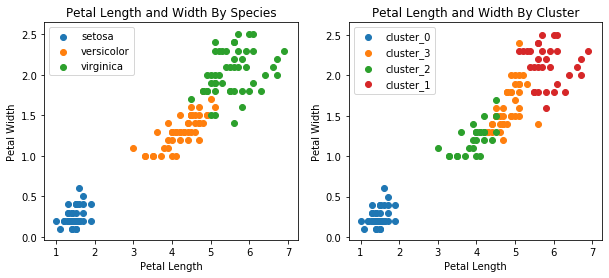

In [12]:
df['cluster'] = kmeans.predict(X)

df.cluster = 'cluster_' + df.cluster.astype('str')

plt.figure(figsize=(10, 4))

plt.subplot(121)

for v in df.species.unique():
    iris = df[df.species == v]
    plt.scatter(iris.petal_length, iris.petal_width, label=v)

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length and Width By Species')

plt.subplot(122)

for v in df.cluster.unique():
    iris = df[df.cluster == v]
    plt.scatter(iris.petal_length, iris.petal_width, label=v)

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length and Width By Cluster')

- Create 3D viz showing centers and data points for running kmeans with 4 clusters.

[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

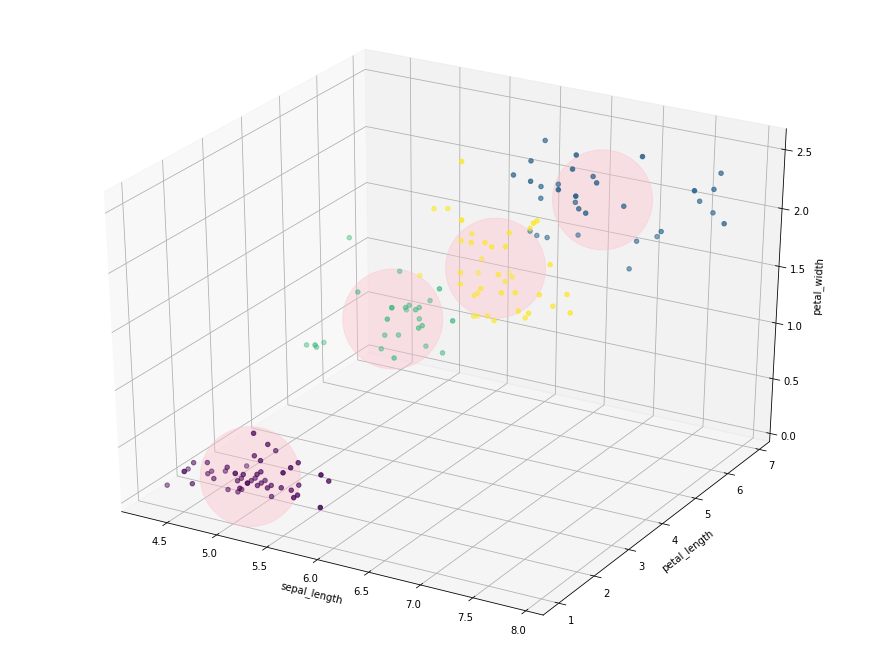

In [26]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)

ax.scatter(df.sepal_length, df.petal_length, df.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c="pink", s=10000, alpha=.4)

ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='petal_width')